<span style="font-size:110%; text-align:left;"><b><a href="../index.html">3.Gaussian Beams</a> > <a href="./index.html">3.Mirror maps</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>3. Applying Phase Maps</b></span>
<br/>

# Table of Contents
 <p><div class="lev1"><a href="#Introduction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1"><a href="#Loading-and-preparing-the-map"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and preparing the map</a></div><div class="lev1"><a href="#Using-the-map"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using the map</a></div><div class="lev1"><a href="#Summary"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></div>

# Introduction

Here we show how to apply a phase map to a mirror used in a Finesse simulation.

** Recommended notebooks before you start:**

We recommend that you have looked through the notebooks that you find in the folder [03_Gaussian_beams>06_Mirror_maps](../06_Mirror_maps). The link above only works if you started IPython/Jupyter Notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more often.

** After this session you will be able to... **

* Make a mirror map ready for being used in FINESSE

We start by loading PyKat and other Python packages that we need:

In [1]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from pykat.optics.maps import *            # Importing maps package
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.18          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



# Loading and preparing the map

A quick map preparation, for more details see the notebook on pre-processing of mirror maps.

Since the spot radius at the ETM in LIGO is 6.2 cm, we use a Gaussian weighting function with radius 6.2 cm to make the area mainly seen by the beam as smooth as possible. 

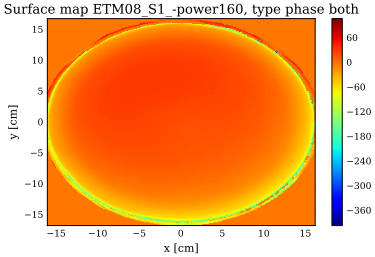

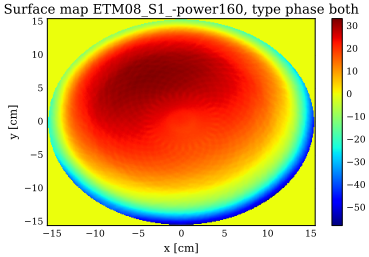

--------------------------------------------------
Preparing phase map for Finesse...
--------------------------------------------------
 Gaussian weights used with radius: 6.20 cm
 (rms, avg) = (8.605e-02, 1.754e-02) nm
--------------------------------------------------
 Centering...
  New center (x0, y0) = (388.45, 388.39)
 Cropping map...
  Size (rows, cols): (777, 777) ---> (777, 777)
  New center (x0, y0) = (388.45, 388.40)
  (rms, avg) = (8.605e-02, 1.754e-02) nm
 Removing curvatures...
  Removed Rc = -2583848.85 m
  Equivalent Z(n=2,m=0) amplitude A20 = -2.33 nm
  (rms, avg) = (1.623e-02, 2.694e-03) nm
 Removing offset...
  Removed z-offset (A00) = 0.548 nm
  (rms, avg) = (1.610e-02, 2.527e-11) nm
 Removing tilts...
  Tilted surface removed:
   xbeta    = -6.15e-08 rad
   ybeta    = 1.26e-07 rad
   z-offset = -4.96e-01 nm
  Equivalent Zernike amplitudes:
   A(1,-1) = 19.35 nm
   A(1, 1) = -9.47 nm
  (rms, avg) = (4.068e-03, 2.564e-03) nm
 Equivalent Z00 amplitude from accumulate

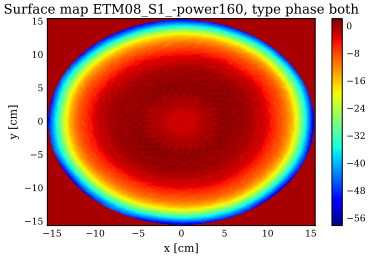

In [2]:
smap = read_map('ETM08_S1_-power160.dat', mapFormat='metroPro')
# Showing unprocessed map
fig1 = smap.plot()
# Cropping
smap.crop(0.154)
# Showing cropped map
fig2 = smap.plot()
# Processing with gaussian weights (also creates the aperture map amap)
amap = smap.preparePhaseMap(w=0.062, verbose=True)
# Showing precessed map
fig3 = smap.plot()

# Using the map

We study a setup with a laser and a cavity, and we measure the amplitude of individual spatial modes inside the cavity while sweeping the tuning of the end mirror. We do this both with and without the surface map and look at the difference.

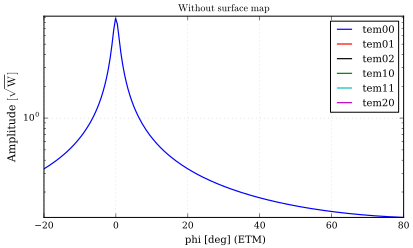

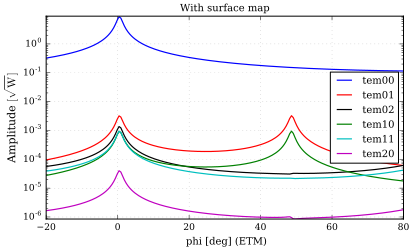

In [20]:
kat = pykat.finesse.kat()
kat.verbose = False
code = """
l laser 1 0 0 n0
s s0 1 n0 n1

m ITM 0.95 0.05 0 n1 n2
s sCav 10 n2 n3
m ETM 1 0 0 n3 n4

cav cavity ITM n2 ETM n3
attr ITM Rc -6
attr ETM Rc 6

ad tem00 0 0 0 n2
ad tem20 2 0 0 n2
ad tem02 0 2 0 n2
ad tem11 1 1 0 n2
ad tem01 0 1 0 n2
ad tem10 1 0 0 n2

phase 2
xaxis ETM phi lin -20 80 201
yaxis log abs
maxtem 2
"""
kat.parseCommands(code)
out1 = kat.run()
fig1 = out1.plot(title='$\mathrm{Without\ surface\ map}$', ylabel='Amplitude $[\sqrt{\mathrm{W}}]$')
#fig1.gca().set_title('hej')
#fig1.show()


# Appyling the map
kat.parseCommands("""
# Appyling the map
map ETM ETM08_S1_-power160_finesse.txt
""")
out2 = kat.run()
fig2 = out2.plot(title='With surface map', ylabel='Amplitude $[\sqrt{\mathrm{W}}]$')

We see that with the surface map, higher order modes are created in the cavity. 

# Summary